In [16]:
from scipy import fftpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [17]:
df  =pd.read_csv('still_on_table.csv')
df.head()

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.008645,0.0464,-0.0281,0.2589,0.264
1,0.011095,0.0464,-0.0281,0.2589,0.264
2,0.012501,0.0179,-0.0151,0.2044,0.206
3,0.014105,0.0179,-0.0151,0.2044,0.206
4,0.015385,0.0179,-0.0151,0.2044,0.206


In [18]:
print(df['az (m/s^2)'][200:2000].mean())
print(df.shape[0]/200)

(2291, 5)

In [21]:
def fft_signal(signal):
    mean = signal.mean()
    sig =signal-mean #normalization
    time_step = 1./200
    time_vec  = df['time']
    sig_fft = fftpack.rfft(sig)
    amplitude  = np.abs(sig_fft)
    power = amplitude**2
    angle  = np.angle(sig_fft)
    sample_freq = fftpack.rfftfreq(sig.size,d=time_step)
    amp_freq = np.array([amplitude,sample_freq])
    return sample_freq,amp_freq

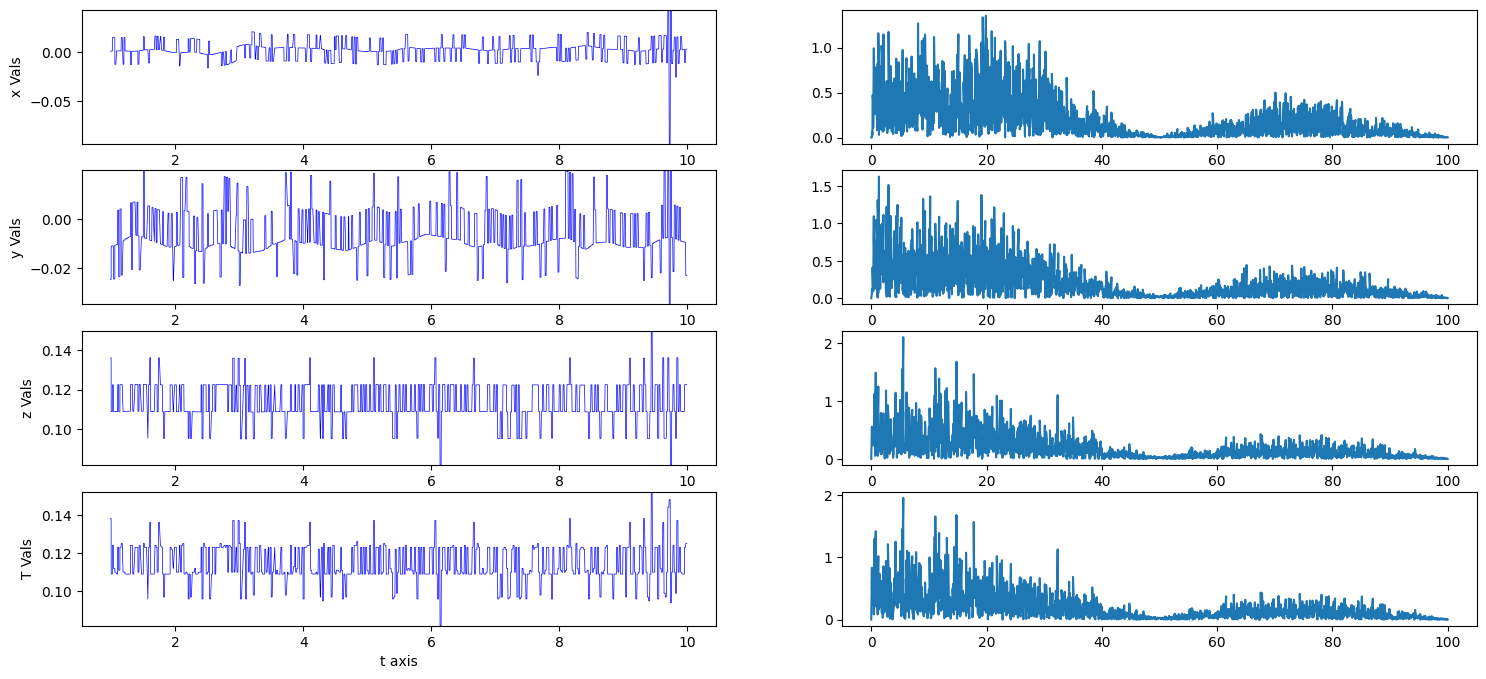

In [32]:
accs = ['ax (m/s^2)','ay (m/s^2)','az (m/s^2)','aT (m/s^2)']
fig, ax = plt.subplots(4,2,figsize=(18,8))
for i in range(len(accs)):
    signal  = df[accs[i]][200:2000].values
    time  = df['time'][200:2000].values
    sample_freq,amp_freq = fft_signal(signal)
    minsignal, maxsignal = signal.min(), signal.max()

    ax[i,0].plot(time, signal, color='b', lw=0.5, label='Noisy Signal')
    ax[i,0].set_ylim([minsignal, maxsignal])
    ax[i,0].set_xlabel('t axis')
    ax[i,0].set_ylabel(f'{accs[i][1]} Vals')
    ax[i,1].plot(sample_freq,amp_freq[0,:],label = 'psd')
fig.savefig('output/stationary')

In [37]:
df  =pd.read_csv('straight_walk.csv')
print(df.shape)

(2167, 5)


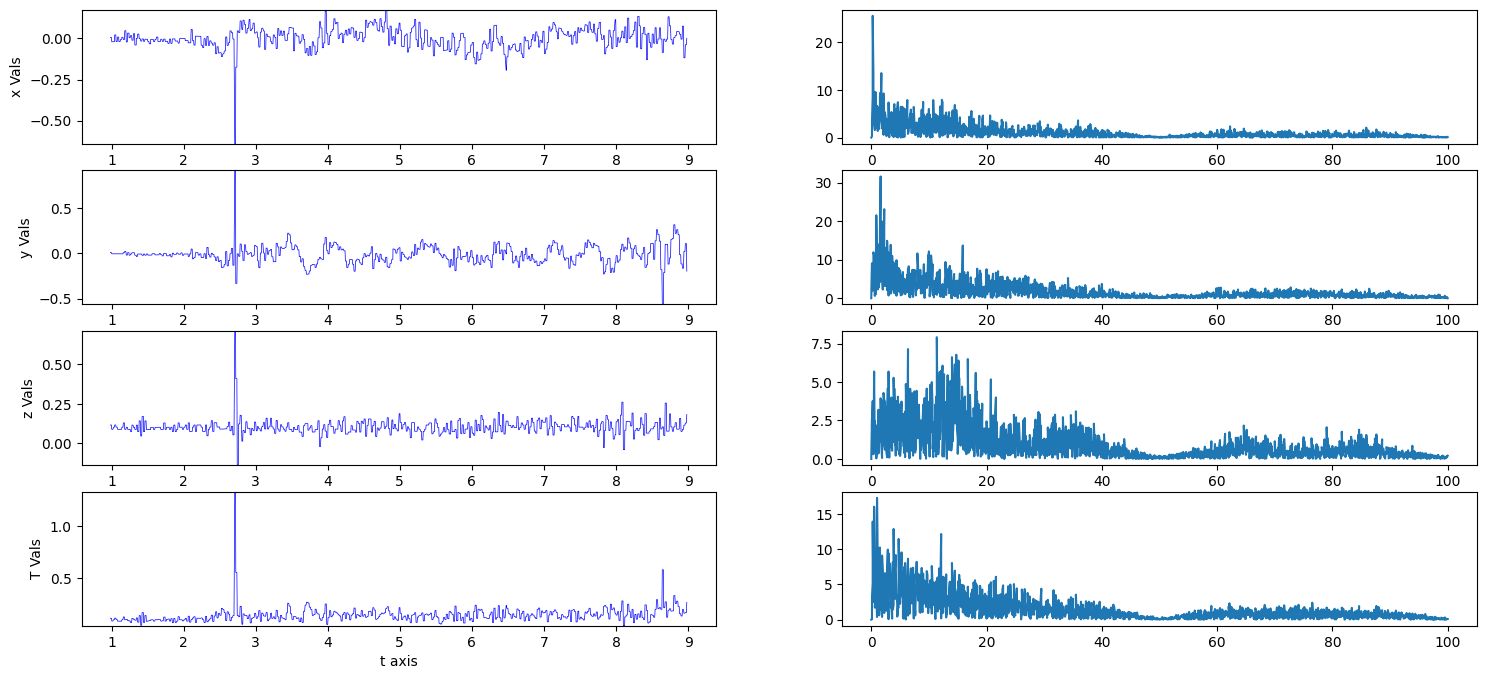

In [38]:
accs = ['ax (m/s^2)','ay (m/s^2)','az (m/s^2)','aT (m/s^2)']
fig, ax = plt.subplots(4,2,figsize=(18,8))
for i in range(len(accs)):
    signal  = df[accs[i]][200:1800].values
    time  = df['time'][200:1800].values
    sample_freq,amp_freq = fft_signal(signal)
    minsignal, maxsignal = signal.min(), signal.max()

    ax[i,0].plot(time, signal, color='b', lw=0.5, label='Noisy Signal')
    ax[i,0].set_ylim([minsignal, maxsignal])
    ax[i,0].set_xlabel('t axis')
    ax[i,0].set_ylabel(f'{accs[i][1]} Vals')
    ax[i,1].plot(sample_freq,amp_freq[0,:],label = 'psd')
fig.savefig('output/staight_walk')

99
5.555555555555555
